# Loading and merging the datasets:

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [95]:
df1 = pd.read_csv('data/RNAseqHarm/dfxROSMAP.csv') 
df2 = pd.read_csv('data/RNAseqHarm/dfxMSBB.csv') 
df3 = pd.read_csv('data/RNAseqHarm/dfxMAYO.csv') 

In [96]:
print(df1['HasAlzheimer'].value_counts())
print(df2['HasAlzheimer'].value_counts())
print(df2['HasAlzheimer'].value_counts())

1.0    984
0.0    834
Name: HasAlzheimer, dtype: int64
0.0    349
1.0    339
Name: HasAlzheimer, dtype: int64
0.0    349
1.0    339
Name: HasAlzheimer, dtype: int64


In [97]:
# Get a list of numerical columns
numerical_cols_df1 = df1.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols_df2 = df2.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols_df3 = df3.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'msex', 'sex', and 'HasAlzheimers' from numerical columns list
for cols in [numerical_cols_df1, numerical_cols_df2, numerical_cols_df3]:
    if 'sex' in cols: cols.remove('sex')
    if 'msex' in cols: cols.remove('msex')
    if 'HasAlzheimer' in cols: cols.remove('HasAlzheimer')

# Create the scaler
scaler = StandardScaler()

# Standardize each dataframe before merging
for df, numerical_cols in zip([df1, df2, df3], [numerical_cols_df1, numerical_cols_df2, numerical_cols_df3]):
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [108]:
print(df1['HasAlzheimer'].value_counts())
print(df2['HasAlzheimer'].value_counts())
print(df2['HasAlzheimer'].value_counts())

1.0    984
0.0    834
Name: HasAlzheimer, dtype: int64
0.0    349
1.0    339
Name: HasAlzheimer, dtype: int64
0.0    349
1.0    339
Name: HasAlzheimer, dtype: int64


In [109]:
dfz = pd.concat([df1, df2, df3])

In [110]:
dfz = dfz.rename(columns={'msex':'sex1'})
dfz = dfz.rename(columns={'sex':'sex2'})

In [111]:
dfz.columns

Index(['specimenID', 'tissue', 'sex1', 'apoe_genotype', 'cogdx',
       'HasAlzheimer', 'ID', 'ENSG00000000003', 'ENSG00000000419',
       'ENSG00000000457',
       ...
       'ENSG00000287898', 'ENSG00000287908', 'ENSG00000287963',
       'ENSG00000287975', 'ENSG00000287981', 'ENSG00000287996',
       'ENSG00000288002', 'ENSG00000288060', 'ENSG00000288067',
       'ENSG00000288096'],
      dtype='object', length=24405)

In [112]:
dfz['HasAlzheimer'].value_counts()

1.0    1403
0.0    1250
Name: HasAlzheimer, dtype: int64

In [113]:
sex_columns = dfz.filter(like='sex', axis=1)
print(sex_columns)

     sex1  sex2
0     1.0   NaN
1     0.0   NaN
2     0.0   NaN
3     0.0   NaN
4     1.0   NaN
..    ...   ...
142   NaN   1.0
143   NaN   0.0
144   NaN   0.0
145   NaN   0.0
146   NaN   1.0

[2653 rows x 2 columns]


In [114]:
dfz['sex'] = dfz['sex2'].fillna(dfz['sex1'])

In [115]:
dfe = dfz[['sex','specimenID', 'tissue', 'sex1', 'apoe_genotype', 'cogdx',
       'HasAlzheimer', 'ID']]

In [116]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 0 to 146
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            2653 non-null   float64
 1   specimenID     2653 non-null   object 
 2   tissue         2653 non-null   object 
 3   sex1           1818 non-null   float64
 4   apoe_genotype  1818 non-null   float64
 5   cogdx          1818 non-null   float64
 6   HasAlzheimer   2653 non-null   float64
 7   ID             2653 non-null   object 
dtypes: float64(5), object(3)
memory usage: 186.5+ KB


In [117]:
dfz = dfz.dropna(axis=1, how='any')

In [118]:
dfz

,specimenID,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000287985,ENSG00000288011,ENSG00000288025,ENSG00000288033,ENSG00000288048,ENSG00000288049,ENSG00000288062,ENSG00000288075,ENSG00000288107,sex
0,492_120515,dorsolateral prefrontal cortex,1.0,492_120515,-0.822823,-0.261834,0.367039,-0.232735,-0.484354,-1.517556,...,0.378728,-0.077814,-0.093656,-0.155878,-0.709228,1.344450,0.319615,1.253366,0.058202,1.0
1,02_120405,dorsolateral prefrontal cortex,1.0,02_120405,-1.538932,1.038598,0.875586,0.729761,-1.043952,-1.278828,...,0.931840,0.509776,0.541692,-0.540544,-1.586965,-0.655504,0.760866,0.604549,-0.151682,0.0
2,03_120405,dorsolateral prefrontal cortex,0.0,03_120405,-1.805362,0.012117,1.718396,0.232539,-1.410122,-2.519731,...,1.465388,1.123928,0.934536,0.684749,-0.446145,-0.478101,2.029803,-0.347486,1.604083,0.0
3,04_120405,dorsolateral prefrontal cortex,0.0,04_120405,-0.231795,0.883396,0.722880,1.551037,-0.635919,-0.513086,...,-0.857878,-0.030459,0.549490,0.257154,-0.660144,-0.611364,-0.077065,-1.024751,-0.221365,0.0
4,07_120410,dorsolateral prefrontal cortex,0.0,07_120410,-1.931548,0.113907,-0.014981,-3.650395,-0.723660,-1.534571,...,0.544473,-0.228896,0.752026,0.703766,-0.249193,1.402110,1.178178,-0.664897,1.265162,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,962_TCX,temporal cortex,1.0,962_TCX,1.551550,-0.212339,0.165679,-0.167573,1.369746,0.734537,...,-0.920832,-0.014401,-1.342048,0.858057,2.418558,0.866873,-3.210687,1.035728,-0.765638,1.0
143,966_TCX,temporal cortex,1.0,966_TCX,-0.457181,-1.781207,-1.456882,0.028861,-0.429900,0.568629,...,-0.513216,-0.498932,0.472148,0.601693,-1.466642,-0.898074,0.489366,0.797683,-0.143412,0.0
144,976_TCX,temporal cortex,1.0,976_TCX,2.754500,-0.691395,1.575576,0.847431,1.230963,1.882273,...,-0.668166,-2.145474,0.230940,0.320076,1.082158,-0.598372,-3.431980,-0.933526,-1.178510,0.0
145,981_TCX,temporal cortex,1.0,981_TCX,-0.274543,0.478340,0.796120,-0.027985,0.063869,0.981759,...,0.429157,0.256060,-0.257013,0.451900,-1.130322,-0.919928,0.355528,-0.276782,1.163919,0.0


# Dimensionality Exploration

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras import models
from keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [120]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from umap import UMAP
import seaborn as sns

In [121]:
X = dfz.drop(['specimenID', 'HasAlzheimer','ID'], axis=1)  
y = dfz['HasAlzheimer']

categorical_cols = ['tissue']  # Add other categorical column names if needed

# Define numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [122]:
not_floats = X.dtypes[~((X.dtypes == 'float64') | (X.dtypes == 'float32'))]
print(not_floats)


tissue    object
dtype: object


In [123]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

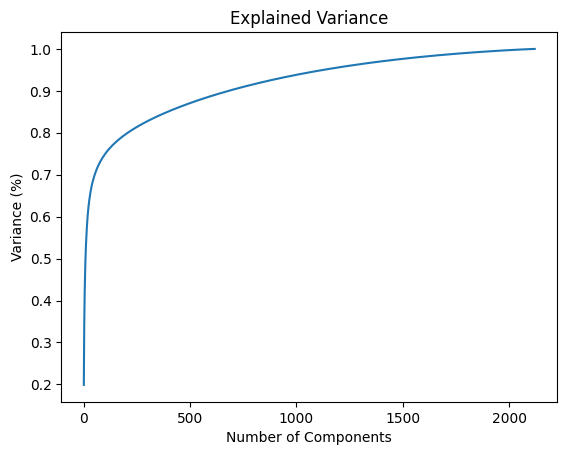

In [125]:
# Fit PCA on your preprocessed data
pca = PCA().fit(X_train_preprocessed)

# Plot the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()


/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_52015/1325340069.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

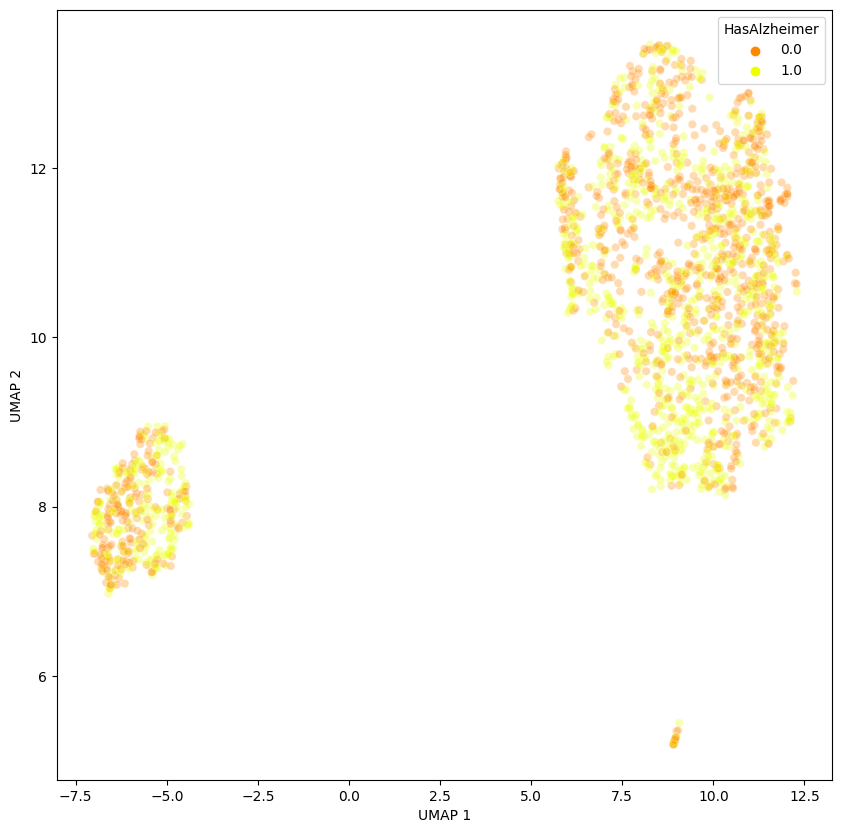

In [126]:
umap = UMAP(n_components=2).fit_transform(preprocessor.transform(X_train))

# Create a DataFrame for visualization
umap_df = pd.DataFrame(data = umap, columns = ['UMAP 1', 'UMAP 2'])

# Create a DataFrame from y_train and reset the index
target_df = y_train.reset_index(drop=True)

# Concatenate umap_df and target_df along the columns axis
umap_df = pd.concat([umap_df, target_df], axis=1)

# Scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="UMAP 1", y="UMAP 2",
    hue="HasAlzheimer",
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend="full",
    alpha=0.3)


# Now on to modeling!